# Feature Vector Extraction, Aggregation, Flattening, and Stacking with AFX

This notebook demonstrates how to use the AFX package to extract, aggregate, flatten, and stack feature vectors from audio samples in the `data` folder. The workflow follows best practices for reproducibility and clarity.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import AFX
from AFX.extractors import cepstral_features, frequency_domain, harmonic_features, time_domain
from AFX.utils import aggregator, shape_utils
from AFX.io import io as afx_io


## Load Audio Data

Load audio files from the `data` folder using AFX's I/O utilities.

In [2]:
# List audio files in the data folder
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), 'data')
audio_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.wav')]

# Load the first audio file for demonstration
file_path = os.path.join(DATA_DIR, audio_files[0])
waveform, sr = afx_io.load_audio(file_path)
print(f"Loaded {audio_files[0]}: waveform shape = {waveform.shape}, sample rate = {sr}")

Loaded 7383-3-0-0.wav: waveform shape = (88200,), sample rate = 22050


## Extract Feature Vectors

Use AFX extractors to compute feature vectors from the loaded audio data.

In [3]:
# Extract MFCCs and spectral features using AFX
mfcc_dict = cepstral_features.extract_mfcc(waveform, sr)
mfcc = mfcc_dict['mfcc']
spectral_centroid_dict = frequency_domain.extract_spectral_centroid(waveform, sr)
spectral_centroid = spectral_centroid_dict['spectral_centroid']
print(f"MFCC shape: {mfcc.shape}")
print(f"Spectral Centroid shape: {spectral_centroid.shape}")

MFCC shape: (13, 173)
Spectral Centroid shape: (1,)


## Aggregate Features

Aggregate the extracted feature vectors (e.g., by computing the mean across frames) using AFX's aggregator utilities.

In [4]:
# Aggregate features (mean pooling, flatten=True)
agg_mfcc = aggregator.aggregate_features({'mfcc': mfcc}, method='mean', flatten=True)['mfcc']
agg_centroid = aggregator.aggregate_features({'centroid': spectral_centroid}, method='mean', flatten=True)['centroid']
print(f"Aggregated MFCC shape: {agg_mfcc.shape}")
print(f"Aggregated Spectral Centroid shape: {agg_centroid.shape}")

Aggregated MFCC shape: (13,)
Aggregated Spectral Centroid shape: (1,)


## Flatten Feature Vectors

Flatten the aggregated feature vectors into 1D arrays using AFX's shape utilities.

In [5]:
# Aggregated feature vectors are already flattened
flat_mfcc = agg_mfcc
flat_centroid = agg_centroid
print(f"Flattened MFCC shape: {flat_mfcc.shape}")
print(f"Flattened Spectral Centroid shape: {flat_centroid.shape}")

Flattened MFCC shape: (13,)
Flattened Spectral Centroid shape: (1,)


## Stack Feature Vectors

Stack multiple flattened feature vectors into a single matrix for further processing or analysis.

In [6]:
# Aggregated feature vectors are already flattened
flat_features = {'mfcc': agg_mfcc, 'centroid': agg_centroid}

# Find the minimum length to align features
min_len = min(f.shape[0] for f in flat_features.values())
feature_matrix = np.vstack([f[:min_len] for f in flat_features.values()])

print(f"Feature matrix shape: {feature_matrix.shape}")

Feature matrix shape: (2, 1)


In [7]:
# Aggregated feature vectors are already flattened
flat_features = {'mfcc': agg_mfcc, 'centroid': agg_centroid}

# Find the maximum length
max_len = max(f.shape[0] for f in flat_features.values())

# Pad each feature to the maximum length
padded_features = [
    np.pad(f, (0, max_len - f.shape[0]), mode='constant')
    for f in flat_features.values()
],

feature_matrix_padded = np.vstack(padded_features)
print(f"Padded feature matrix shape: {feature_matrix_padded.shape}")

Padded feature matrix shape: (2, 13)


# Visualizing Extracted Feature Matrices
Let's visualize the `feature_matrix` and `feature_matrix_padded` using 2D and 3D plots to better understand their structure and content.

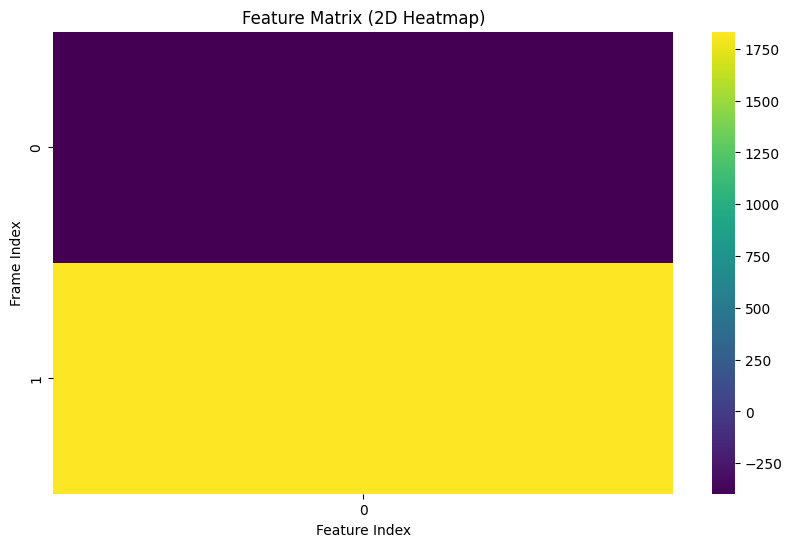

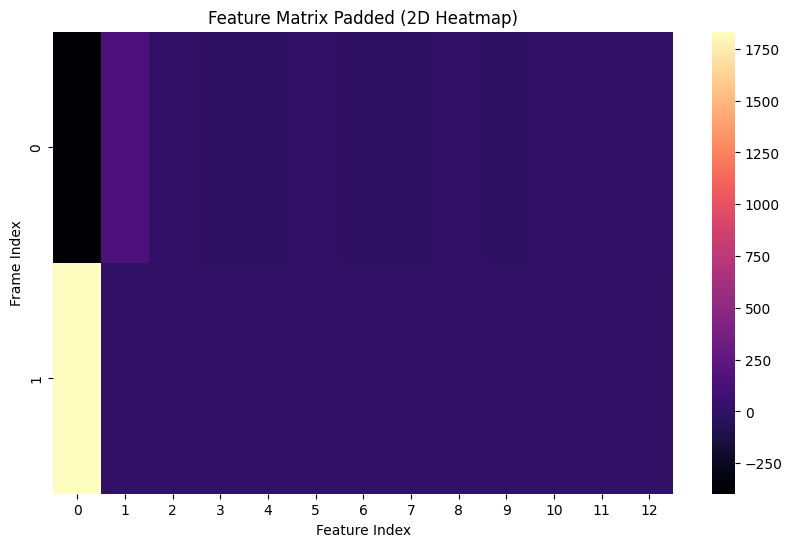

In [8]:
# Visualize feature_matrix (2D heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(feature_matrix, cmap='viridis', cbar=True)
plt.title('Feature Matrix (2D Heatmap)')
plt.xlabel('Feature Index')
plt.ylabel('Frame Index')
plt.show()
 
# Visualize feature_matrix_padded (2D heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(feature_matrix_padded, cmap='magma', cbar=True)
plt.title('Feature Matrix Padded (2D Heatmap)')
plt.xlabel('Feature Index')
plt.ylabel('Frame Index')
plt.show()
 